# Plotting i SymPy

**Foreslået ændringer:**  
I denne notebook har Christian en del kommentarer til forskellige formuleringer. Dem synes jeg godt, at vi kan indrage. Eksempelvis kan vi kalde funktioner med et keyword på hver linje, hvilket gør det en del mere overskueligt. 

Der er ikke nogle større ændringer til indhold, men blot en masse småting, som vi nemt kan ændre. 

Vi kan tegne grafer for funktioner og udtryk ved hjælp af SymPy. Det mest grundlæggende værktøj er funktionen <code>plot</code>, som vi importerer fra <code>sympy.plotting</code> her:

In [1]:
# Den anbefalede standardblok for SymPy:
import sympy as sp                    # Importer sympy
from sympy.abc import x               # Vi vælger at importere x som symbolsk variabel.
from sympy import oo, pi, I           # Vi importerer uendelig, pi og den imaginære konstant I 
sp.init_printing()                    # Aktiver pretty-printing
from IPython.display import display   # Hent vores printer til matematiske udtryk

# Specifik import til plotteformål:
from sympy.plotting import plot

For at komme i gang vil vi gerne tegne grafen for en sinuskurve og definerer derfor først sinus som et udtryk:

In [2]:
expr = sp.sin(x)

og tegner derefter ved at bruge funktionen <code>plot</code>.

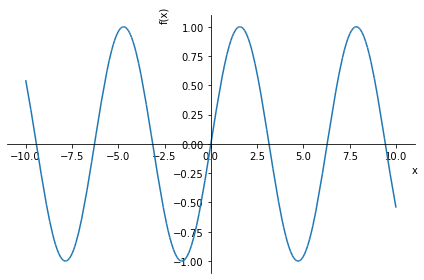

In [3]:
plot(expr);

Bemærk semikolonet, der beder Python om ikke at skrive outputtet, som her ville være en kode i stil med <code>sympy.plotting.plot.Plot at 0x136af246608</code>, som ikke er så relevant i denne kontekst.

Hvis man ønsker at tegne grafen for et bestemt $x$-interval, skriver man <code>plot(udtryk, (variabel, start, slut))</code>. Eksempel:

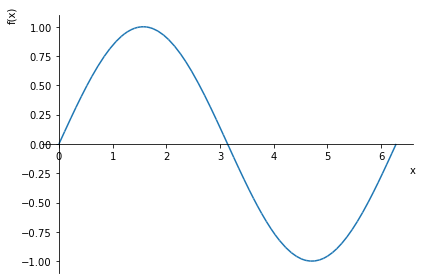

In [4]:
plot(expr, (x, 0, 2*pi));

Man behøver naturligvis ikke at definere udtrykket først som en variabel, men kan skrive funktionen eller udtrykket direkte ind i <code>plot</code>. Hvis man ønsker at lave flere grafer i samme figur, kan man skrive <code>plot(udtryk_1, udtryk_2, (variabel, start, slut))</code> som det fremgår her:

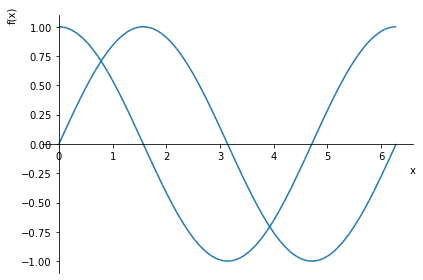

In [5]:
plot(sp.sin(x), sp.cos(x), (x, 0, 2*pi));

## Parametre for Plot
Udover at angive funktionen/udtrykket og afgrænsningen af den variable, kan man til <code>plot</code> angive en del andre oplysninger, som angives ved at tilføje <code>keyword = værdi</code> i slutningen af udtrykket. Nogle hyppigt anvendte keywords er:
- <code>title</code> angiver titlen på figuren. Angiv værdien som en string, altså som "Ønsket titel"
- <code>legend</code> angiver om der skal stå en beskrivelse af graferne. Angiv i så fald værdien <code>True</code>
- <code>line_color</code> giver grafen en bestemt farve. Angiv værdien som en string, der indeholder en standardfarve, eksempelvis "red", "green", eller som en RGB-farvekode (r, g, b), hvor de tre værdier er mellem 0 og 1 
- <code>xlim</code> og <code>ylim</code> fastlægger aksernes afgrænsninger i hhv. vandret og lodret retning. Angiv to værdier <code>(fra, til)</code> for hver akse.
- <code>xlabel</code> og <code>ylabel</code> sætter navne på hhv. $x-$ og $y-$akse. Angiv som string. 

Andre keywords kan findes i [dokumentationen her](https://docs.sympy.org/latest/modules/plotting.html)

Med disse muligheder kan vi forbedre vores seneste figur:

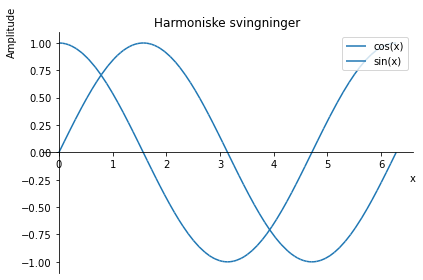

In [6]:
plot(sp.cos(x), sp.sin(x), (x, 0, 2*pi), title = "Harmoniske svingninger", legend = True, xlabel = "x", ylabel = 'Amplitude');

Den kompakte kommando til plotning af to grafer tillader desværre ikke umiddelbart at vi giver dem forskellige farver. For at gøre det, kan vi gemme selve figuren som et objekt med et navn ligesom en variabel, hvorefter det er muligt at ændre på de forskellige indstillinger:

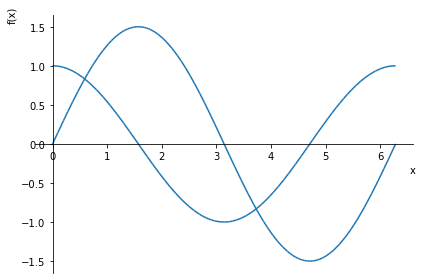

In [7]:
# Vi tegner en graf og navngiver resultatet som et objekt ved navn "figur"
figur = plot(sp.cos(x), 1.5*sp.sin(x), (x, 0, 2*pi))

Når vi vil ændre indstillingerne for en eksisterende graf, er syntaksen <code>figurnavn.keyword = ny_værdi</code>

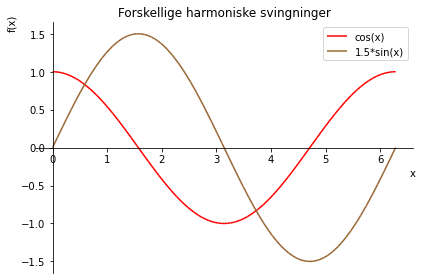

In [8]:
figur.legend = True
figur.title = "Forskellige harmoniske svingninger"
figur[0].line_color = 'red'  # Der er flere kurver i figuren, og hver af dem har en farve. 
                             # Kurverne har nummer 0, 1, 2, ... i den rækkefølge, de blev tegnet, så cosinus-kurven er 0
figur[1].line_color = (0.6, 0.4, 0.2)  
                             # ... og sinus er nummer 1. Her bruges RGB-farvekode. Farven er brun!
                             
# Efter at have ændret indstillingerne, beder vi Python om at opdatere figuren:
figur.show()

## Figurer som lister

I overstående eksempler har vi benyttet indeksering (som vi kender det fra lister) til at ændre på forskellige parametre. En af fordelene ved dette er at vi kan udvide vores figur ved brug af <code>.append()</code> og <code>.extend()</code> til at bygge videre på en figur, hvis vi ønsker at samle flere plots i en figur. Som eksempel vil vi bruge <code>.append()</code> til at tilføje en ekstra kurve til overstående figur. 

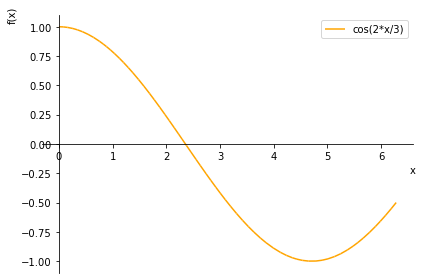

In [9]:
f = sp.cos(2*x/3)

figur2 = plot(f, (x, 0, 2 * pi), line_color = 'orange', legend = True)

Denne kurve har nu fået objektnavnet <code>figur2[0]</code> fordi det er den første kurve i figuren, og vi kan nu tilføje den til <code>figur</code> ovenfor ved hjælp af <code>append</code>:

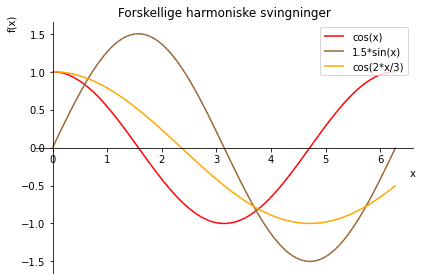

In [10]:
figur.append(figur2[0])
figur.show()

Hvis man vil kombinere figurer, som alle har flere kurver, kan man bruge <code>.extend()</code> til at tilføje alle plots fra en figur til den anden. Hvis <code>figur2</code> således havde haft 2 kurver, ville vi kunne tilføje begge  til <code>figur</code> ved at skrive <code>figur.extend(figur2)</code>.

# Gaffelfunktioner 
Hvis vi ønsker at lave stykvis definerede funktioner, der har forskellige funktionsudtryk i forskellige intervaller (også kendt som "gaffelfunktioner"), kan vi benytte <code>sp.Piecewise()</code>. Syntaksen  er <code>sp.Piecewise((udtryk1, intervalbetingelse1), (udtryk2, intervalbetingelse2))</code>. Funktionen 
$$f(x) = \begin{cases} -1 \quad &x < 4 \\ x - 5 \quad &x \geq 4\end{cases}$$
angives derfor som

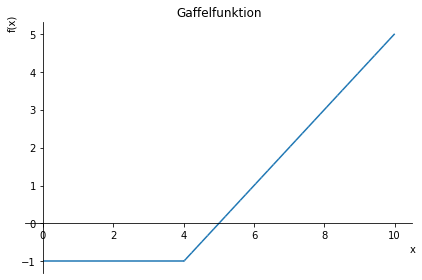

In [11]:
f = sp.Piecewise((-1, x < 4), (x-5, x >= 4))

figur3 = plot(f, (x, 0, 10), title = "Gaffelfunktion")

<code>sp.Piecewise</code> kan arbejde med et større antal udtryk og intervalbetingelser end blot to som i eksemplet. Hvis nogle $x$-værdier opfylder flere af intervalbetingelserne, anvender SymPy det første udtryk hvor et givet $x$ opfylder betingelsen. Man kan bruge dette på en smart måde hvis man skal tegne en gaffelfunktion, hvor samme udtryk gælder i flere intervaller for $x$. Man kan eksempelvis lade det andet udtryk gælde alle steder, hvor den første ikke gælder, ved blot at angive andet udtryks intervalbetingelse som <code>True</code> og angive det som det sidste udtryk. Hvis forklaringen ikke er tydelig, håber vi at et eksempel kan hjælpe: Betragt funtionen
$$g_1(x) = \begin{cases} -2x \quad &x < -2 \\ x^2 \quad &-2\leq x\leq 2\\ 2x \quad &2 < x\quad \end{cases}$$
som kan skrives kortere som 
$$g_2(x) = \begin{cases} x^2 \quad &|x|\leq 2\\ 2|x| \quad &\mbox{ellers}\end{cases}$$
På samme måde kan denne funktion defineres i Python på 2 ækvivalente måder:

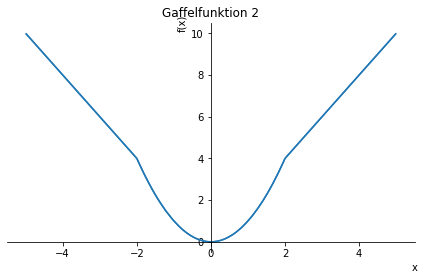

In [12]:
g1 = sp.Piecewise((-2*x, x<-2), (x**2, abs(x) <= 2),(2*x, x>2))
g2 = sp.Piecewise((x**2, abs(x) < 2),(2*abs(x), True))   # Bemærk at vi for andet udtryk med vilje
# ikke skriver nogen betingelse for x, men blot 'True', som altid er opfyldt, idet vi ønsker at bruge det
# andet udtryk når betingelsen for første udtryk (abs(x)<=2) ikke er opfyldt.

figur = plot(g1, g2, (x, -5, 5), title = "Gaffelfunktion 2") # Vi ser kun en kurve, da udtrykkene er ens.

Angives udtrykkene derimod i omvendt rækkefølge, kommer udtrykket $x^2$ aldrig i brug, da betingelsen <code>True</code> altid er opfyldt, og det er blot <code>abs(x)</code>, dvs. $|x|$, der tegnes

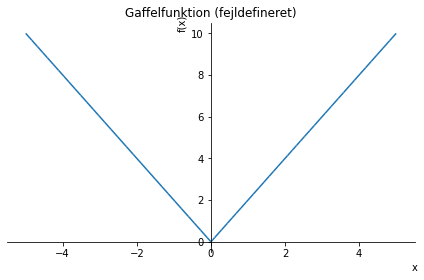

In [13]:
g = sp.Piecewise((2*abs(x), True), (x**2, abs(x) < 2))

figur = plot(g, (x, -5, 5), title = "Gaffelfunktion (fejldefineret)")